In [85]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [164]:
means = [[-2, -2], [2, 2]]
cov = [[2, -0.5], [-0.5, 1.5]]
n_samples = 100
X1 = np.random.multivariate_normal(means[0], cov, n_samples)
X2 = np.random.multivariate_normal(means[1], cov, n_samples)
X_data = np.concatenate((X1, X2), axis = 0)
Y_data = np.zeros((2*n_samples, 1), dtype = np.uint8)
Y_data[n_samples:] = 1
print(X_data.shape)
print(Y_data.shape)

(200, 2)
(200, 1)


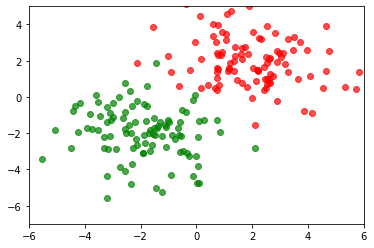

In [165]:
plt.scatter(X1[:, 0], X1[:, 1], c = 'g', alpha = 0.7)
plt.scatter(X2[:, 0], X2[:, 1], c = 'r', alpha = 0.7)
plt.axis([-6, 6, -7, 5]);

In [88]:
#   Convert to torch tensor
X_train = torch.from_numpy(X_data.astype(np.float32))
Y_train = torch.from_numpy(Y_data.astype(np.float32))
print(X_train.shape)
print(Y_train.shape)

torch.Size([200, 2])
torch.Size([200, 1])


In [167]:
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super().__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, X):
        return torch.sigmoid(self.linear(X))
        
n_features = 2
model = LogisticRegression(n_features)

In [168]:
learning_rate = 1e-2
epochs = 500
loss_func = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [174]:
for epoch in range(epochs):
    Y_pred = model(X_train)

    loss = loss_func(Y_pred, Y_train)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

In [175]:
[w, b] = model.parameters()
W0 = w[0][0].item()
W1 = w[0][1].item()
B = b.item()

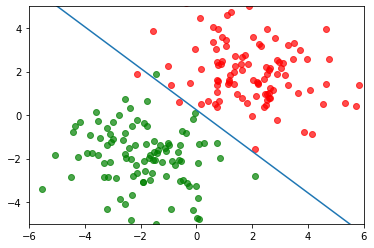

In [179]:

plt.scatter(X1[:, 0], X1[:, 1], c = 'g', alpha = 0.7)
plt.scatter(X2[:, 0], X2[:, 1], c = 'r', alpha = 0.7)
plt.axis([-6, 6, -5, 5])

[w, b] = model.parameters()
plt.plot([-6, 6], [-(B + W0*(-6))/W1, -(B + W0*(6))/W1]);